# Data Collection Final Project: Logistic Regression with Machine Learning
### Laiken Wade and Ryan Brinson
### Fall 2024

#### Objective
Logistic regression is a fundamental machine learning algorithm used for binary classification tasks, where the goal is to predict one of two possible outcomes. Unlike linear regression, which predicts a continuous value, logistic regression predicts probabilities that map to binary outcomes using the logistic (sigmoid) function. We will use this aspect of the algorithm to determine whether or not a stuent will be admitted to a University. It will look at the students GPA, GRE score, and their rank to try and make this determination. 

##### Key Concepts 
1. **Machine Leaning**: In this case, it is the process by which data is passed through a Multi-Layer Perceptron (MLP) that produces an output, this is called the forward propagation. The algorithm then judges how well the MLP did, and creates a loss. A gradient is created based off this loss and is passed back through the MLP to adjust the internal parameters, this is called the back propagation. This is done repeatidly to reduce the amount of loss. Machine learning is charactarized by the following equation:  $$a^{[l]} = f\left(W^{[l]}a^{[l - 1]} + b^{[l]} \right) $$

2. **Sigmoid Function**: Logistic regression employs the sigmoid function, which maps any real-valued number to a value between 0 and 1. This output can be interpreted as the probability of the positive class and is defined by the equation: $$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

3. **Decision Boundary**: The algorithm determines a threshold to classify outputs. If the predicted probability is greater than or equal to the threshold, the instance is classified as the positive class; otherwise, it’s classified as the negative class.

4. **Loss Function**: Logistic regression uses a loss function known as cross-entropy or log-loss to measure the performance of the model. The goal is to minimize this loss during training and can be summarized by: $$ \text{Log Loss} = \sum_{i=0}^{N} \left[ -y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right] $$

#### Advatnages
- Simple to implement and interpret.

- Efficient for binary classification with relatively small datasets. In our case, if a student will be admitted or not.

- Provides probabilities, offering insight into confidence levels of predictions.

### 1. We first import all the relavent libraries

The majority of the data processing will be done with the scikit learn toolset. This is a very powerful toolkit that is commonly used for machine learning. 

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

### 2. Import the data
All relavent data is stored in a comma separated value file known as a csv. This is a very common way of storing data as it is easy to parse. The csv is imported using the Pandas library as it is a commonly used and well documented library. After the csv is imported, we then display some basic information about the data.

In [73]:
admission = pd.read_csv('dataset_admissions.csv')
admission.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [74]:
admission.shape 

(400, 4)

#### Standard Diviatoin
Standard deviation is a statistical measure that quantifies the amount of variation or dispersion in a set of numerical data. It indicates how spread out the values are from the mean (average) of the data set. A low standard deviation means that the data points are close to the mean, while a high standard deviation indicates that the data points are spread out over a wider range.

We can see from the output that the GRE scores have the highest standard deviation. Meaning that it has the widest variance of all the parameters. The other parameters are very tightly centered around the means. 

In [75]:
admission.std()

admit      0.466087
gre      115.516536
gpa        0.380567
rank       0.944460
dtype: float64

#### Data Description
One of the ways that Pandas is so useful is that it provides simmple API calls that allows us to get information about the data very quickly. In this case we can see that each column has various statistics like count, mean, and distribution. The dataset is faily sizable with 400 data points. This allows for a decent amount of accuracy in our informatics.

In the Admit column we see that the mean is below 0.5. Because the data is binary, only 0 or 1, the mean being below 0.5 indicates that the data trends closer to 0. This further indicatest that the admittance to the University is low with the majority of applicants being rejected.

In [76]:
admission.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


#### GRE and GPA Distribution
In order to get a better look at how the GRE score and GPAs are distributed we use matplotlib to create bar graphs of the data. The data appears to be faily normally distributed around their respective means. But what is very clear is that there is a large portion of students at the upper bounds. This seems out of place, but if the school is prestigous enough, this could be a selection bias of sorts indicating that a large portion of high achieving students apply to this particular school.

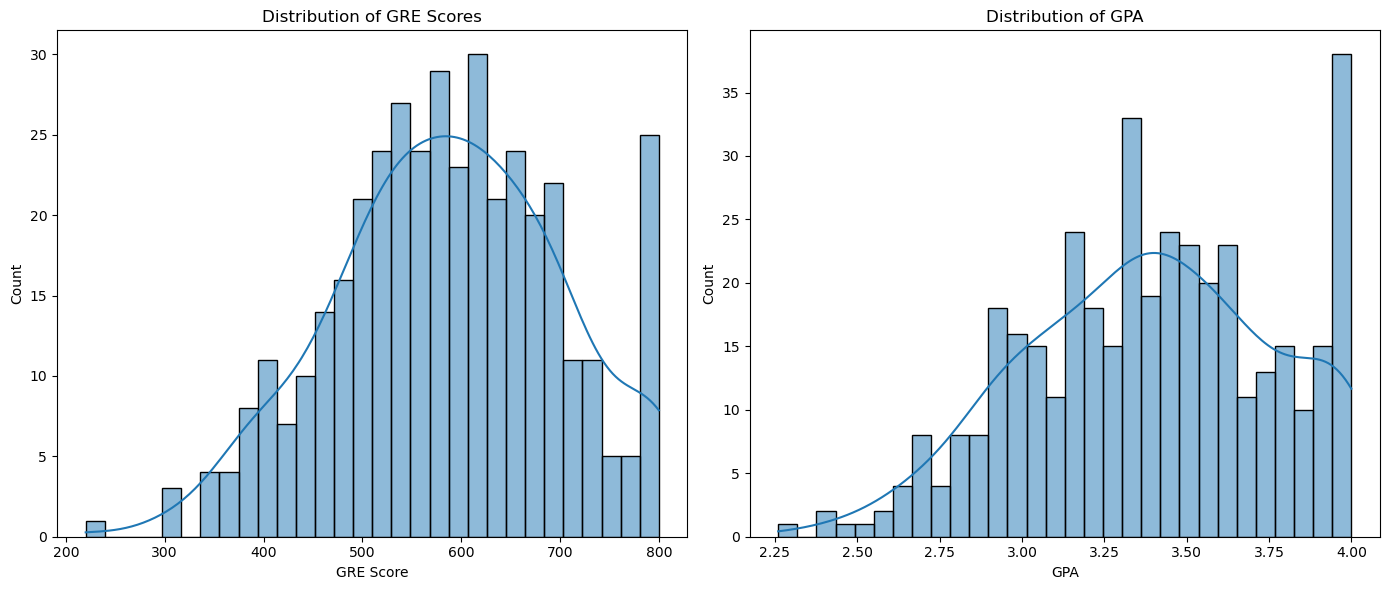

In [77]:
# Plot histograms for numerical features
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(admission['gre'], kde=True, bins=30)
plt.title('Distribution of GRE Scores')
plt.xlabel('GRE Score')

plt.subplot(1, 2, 2)
sns.histplot(admission['gpa'], kde=True, bins=30)
plt.title('Distribution of GPA')
plt.xlabel('GPA')

plt.tight_layout()
plt.show()


#### All distributions
Here we plot all the columns into their respective histopgrams to visualize their distributions. We can see again that the proportion of students admitted is scewed away from acceptance, meaning the majority of students are rejected. We also see that the majority of applicants are rank 2 with the fewest being rank 1. It makes sense that if this is a prestigious school that the majority of the students applying fall into a rank 1 or 2 category as they are the students that feel as if they have the best chances.

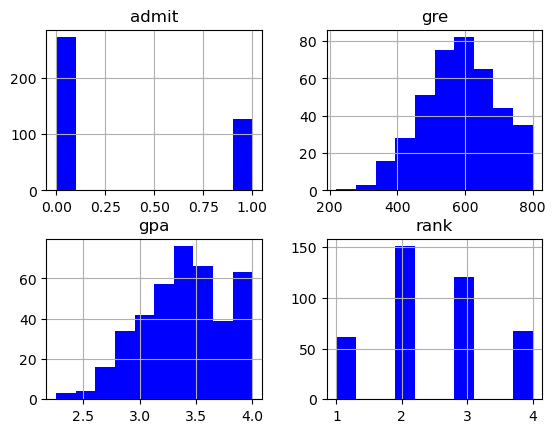

In [78]:
admission.hist(color="blue")
plt.show()

#### Heat Map
Heat maps are graphical representations of data where individual values contained in a matrix are represented as colors. They are particularly useful for visualizing complex data sets, as they allow for the quick identification of patterns, correlations, and outliers within the data. Each cell in a heat map corresponds to a specific data point, and the color intensity of the cell indicates the magnitude of the value. By transforming numerical data into visual color gradients, heat maps provide an intuitive and immediate way to discern large-scale data trends and insights.

What our heatmap is showing us is there doesn't seem to be a strong correlation between admittance and and of the other statistics. The strongest correlation we see is between GPA and rank, showing and inverse relation, indicating that rank is most likely partially determined by GPA. We also see a decent correlation between GPA and GRE score. This makes sense because a student with a high GPA is more likely to do well on the GRE. But this is not strictly true as and intelligent underachiever could have a low GPA and a high GRE just like an average intellegint student could be an over achiever.

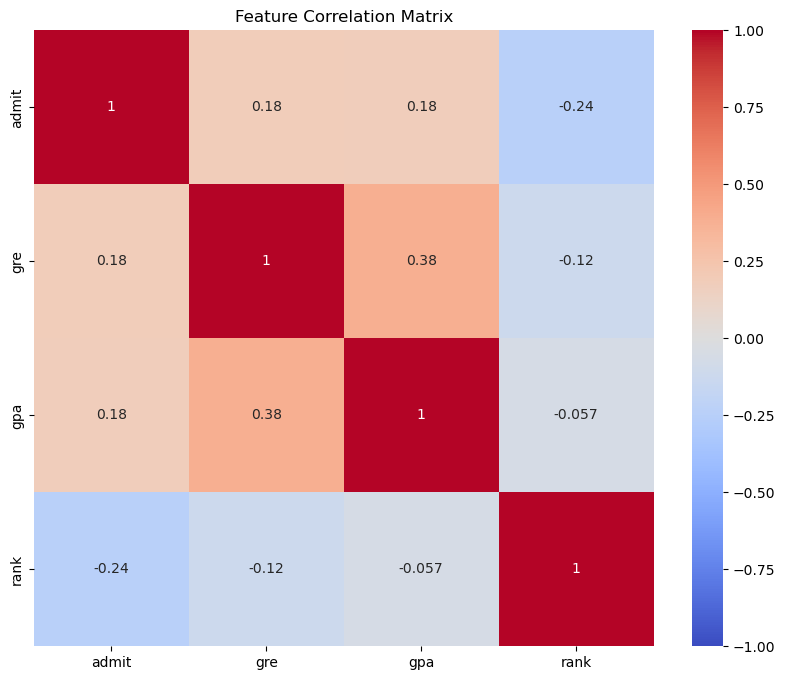

In [79]:
# Correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(admission.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()


### 3. Create subsets of the data and train the model
Separating data into training and testing subsets is crucial in machine learning to ensure that models generalize well to unseen data. The training subset is used to teach the model, allowing it to learn patterns and relationships within the data. The testing subset, on the other hand, is used to evaluate the model's performance and accuracy on new, unseen data. This distinction helps in assessing how well the model can generalize and predict outcomes beyond the data it was trained on. By avoiding overfitting to the training data, this practice ensures that the model remains robust, reliable, and capable of making accurate predictions in real-world scenarios.

In [80]:
# Splitting the data into features and target
X = admission[['gre', 'gpa', 'rank']]
y = admission['admit']

We designate our inputs as X and our outputs as Y. Here we have our inputs of GRE, GPA, and Rank while the outputs are the admission status. The function train_test_split takes our two main datasets and breaks them randomly into four smaller ones with a precentage of $80\%$ going into the test dataset and $20\%$ going into the test dataset.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Importance of Normalizing Data in Machine Learning

Normalizing data improves model performance by ensuring features are on a similar scale, which speeds up convergence, avoids numerical issues, and reduces bias. It's essential for algorithms that assume features are comparably scaled and prepares data for regularization.

In [82]:
# Normalizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Building our model

One of the reasons sklearn is so popular is because of the how easy it makes it to build and train machine learning models. Here you can see that in order to build the model all you have to do is assign a built in class to a variable. Once the class is assigned, it is able to call all of the built in methods. So all the user has to do is call the fit method and pass it the training data, and away it goes.

In [83]:
# Creating and training the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### 4. Evaluate the success of the model

In order to evaluate the model, we must pass it data it hasn't seen before and see what the outcome is and how well the model perfomes. This is what we are doing by passing the X_test data into the model and storing the results in y_pred.

In [ ]:
# Making predictions
y_pred = log_reg.predict(X_test)


#### Accuracy
We can determine the accuracy by seeing the degree to which out model agrees and disagrees with the actual outcomes. As you can see the model was only able to make an accurate prediction  $\sim 70\%$ of the time. This is good, but not great. What this indicates is that the model had a very tough time determining an pattern. 

In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 67.50%
Confusion Matrix:
[[50  3]
 [23  4]]


In [86]:
class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.94      0.79        53
           1       0.57      0.15      0.24        27

    accuracy                           0.68        80
   macro avg       0.63      0.55      0.51        80
weighted avg       0.65      0.68      0.61        80



#### Confusion Matrix

The confusion matrix shows us where the model got "confused" and miss identified that admittance status of a student. It was decently good at determining if a student would be rejected, but not near as good at determining if they would be accepted. The upper left $50$ is the number of times the model correctly determined if a student would get rejected indicated by the intersection of the 0's. The bottom left $23$ determines a miss caracterization of acceptance when when the student was actually rejected. The worst metric by far is the bottom right $4$. This is how many times the model was abot to accuratly determine if a student was accepted.

<Axes: >

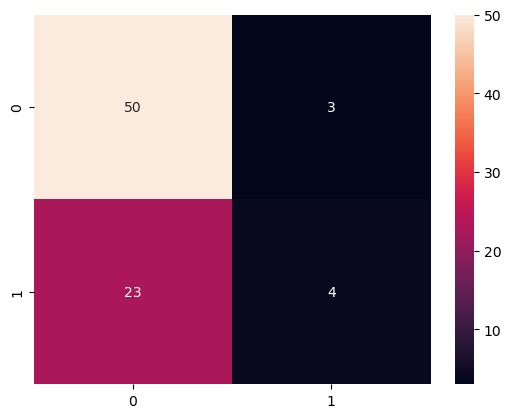

In [87]:
sns.heatmap(conf_matrix, annot=True)

This inability to determine if a student would be accepted is reflected in the percentage below. Only being able to deterimne the correct outcome $\sim 40\%$ of the time is not very good.

In [88]:
A_final = np.random.randn(X_train.shape[1])

linear_combination = np.dot(X_train, A_final)
prediction = 1 / (1 + np.exp(-linear_combination))
class_y = (prediction >= 0.5).astype(int)
num_misclassified = np.sum(class_y != y_train)
accuracy = np.mean(class_y == y_train) * 100

print(f"Number of misclassified examples: {num_misclassified}")
print(f"Prediction accuracy on the training data: {accuracy:.2f}%")


Number of misclassified examples: 185
Prediction accuracy on the training data: 42.19%


#### Logistic Regression Coefficients
In scikit-learn, logistic regression coefficients represent the relationship between the input features and the log-odds of the target class. Each coefficient indicates the change in the log-odds of the outcome for a one-unit change in the corresponding feature, holding all other features constant. These coefficients help in understanding the impact of each feature on the predicted probability of the target class and are accessible via the .coef_ attribute of the LogisticRegression model after fitting the data.

So, what we see is that there are not any strong coefficients. The strongest there is is Rank, and it is only decently strong.

Feature Coefficients:
  Feature  Coefficient
0     gre     0.200257
1     gpa     0.330198
2    rank    -0.577485


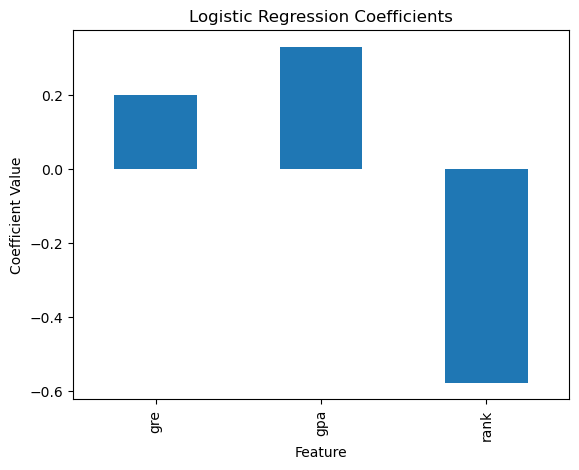

In [89]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Print coefficients
coefficients = pd.DataFrame({'Feature': ['gre', 'gpa', 'rank'], 'Coefficient': model.coef_[0]})
print("Feature Coefficients:")
print(coefficients)

# Visualize coefficients
coefficients.set_index('Feature').plot(kind='bar', legend=False)
plt.title('Logistic Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.show()



### 5. Conclusion

What we can determine from this data is that our model had a very difficult time finding underlying patterns given this dataset. What we suspect is happening is that our data does not include a lot of the nuances of the application process. We believe that the GPA, GRE, and Rank is not enough data to determine how the University deciedes to accept and reject students. Other factors most go into the decision making process such as a written essay, extra curricular activities, etc. Because we do not have this information the best we can do is determine if a particular student has good or bad chances of acceptance based off their GPA and GRE, but we cannot say for certain if they will actually be accepted. 